<a href="https://colab.research.google.com/github/souptikmajumder/Boston-Crimes/blob/master/Boston_Crime_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter


In [10]:
from google.colab import files
uploaded = files.upload()

Saving crime.csv to crime (2).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['crime.csv']),encoding='iso-8859-1')

In [31]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [32]:
df.shape

(319073, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [34]:
Counter(df['UCR_PART'])

Counter({'Other': 1232,
         'Part One': 61629,
         'Part Three': 158553,
         'Part Two': 97569,
         nan: 90})

So, I am going to do analysis explicitly for part I , part II  Crimes as classified by UCR(Uniform Crime Reports). <b>According to UCR part - I Crimes are serious crimes which has to be reported to police.</b><br>
<b>Whereas part-II Crimes are crimes which are less serious and does not involve serious threat or danger.</b>

In [35]:
df.isna().sum() # Number of null values in each column

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [36]:
df['SHOOTING'].isna().sum()/len(df['SHOOTING']) *100

99.6806373463126

We see that , the number of null-values in column 'SHOOTING' is around 99.6%. <b>But, it is important to mark and analyse the areas/cases where crime has involved shooting to avoid loss of casualties in future.</b>So, we replace the NaN values with N for no shooting.

In [0]:
df['SHOOTING'].replace(np.nan,'N',inplace=True)

In [38]:
Counter(df['STREET']).most_common()[:3]  

[('WASHINGTON ST', 14194), (nan, 10871), ('BLUE HILL AVE', 7794)]

We see that the second highest number of crimes are reported in street that have null values. So , we cannot ignore these crimes and hence we can introduce a label<b>'UNKNOWN_street'</b> for replacing these null values.

In [0]:
df['STREET'].replace(np.nan,'UNKNOWN_street',inplace=True) # replacing the nan values with unknown street

In [0]:
# Replacing the -1 values in latitude and longitude with NaN Values
df['Lat'].replace(-1,np.nan,inplace=True)
df['Long'].replace(-1,np.nan,inplace=True)

In [0]:
df['OCCURRED_ON_DATE']=pd.to_datetime(df['OCCURRED_ON_DATE'])

In [42]:
Counter(df['UCR_PART'])

Counter({'Other': 1232,
         'Part One': 61629,
         'Part Three': 158553,
         'Part Two': 97569,
         nan: 90})

In [0]:
crimes=['Part One','Part Two']
df = df.loc[df['UCR_PART'].isin(crimes)] #Analysing the data only for part-One and Part-Two Crimes

Dropping non-useful columns like INCIDENT_NUMBER,OFFENSE_CODE,Location,UCR_PART

In [0]:
data = df.drop(columns=['INCIDENT_NUMBER','OFFENSE_CODE',"Location"])

In [0]:
data = data.loc[data['UCR_PART']=='Part One'] #analysing Part-I Crimes only

In [46]:
data = data.drop(columns=['UCR_PART'])
data.shape #this is the final dataset which will be analysed upon

(61629, 13)

Now, we are good to go for analysis for Part-I  Crimes commited over a period of 2015-2018.

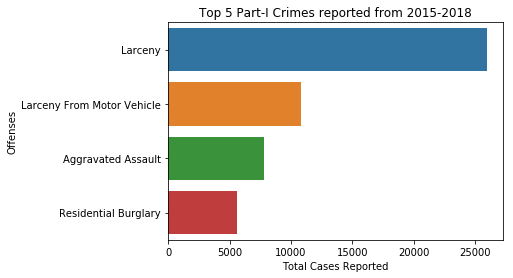

In [47]:
temp = data['OFFENSE_CODE_GROUP'].value_counts()[:4]
df_offense = pd.DataFrame({'Offenses':temp.index,'Total Cases Reported':temp.values})
sns.barplot(y='Offenses',x='Total Cases Reported',data=df_offense)
plt.title('Top 5 Part-I Crimes reported from 2015-2018')
plt.show()


As we see that ,<font color = red><b>Larceny</b></font> is the most committed Part-I crime from the year 2015-18.

<i>Let's visualise the trend of the top 4 crimes over the year 2015-2018.</i>

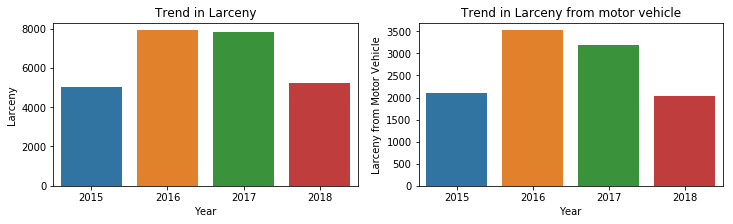

In [49]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
temp=data.loc[data['OFFENSE_CODE_GROUP']=='Larceny']['YEAR'].value_counts()
df_larcency = pd.DataFrame({'Year':temp.index,'Larceny':temp.values})
sns.barplot(x='Year',y='Larceny',data=df_larcency)
plt.title('Trend in Larceny')
plt.subplot(1,2,2)
temp=data.loc[data['OFFENSE_CODE_GROUP']=='Larceny From Motor Vehicle']['YEAR'].value_counts()
df_larcency_motor = pd.DataFrame({'Year':temp.index,'Larceny from Motor Vehicle':temp.values})
sns.barplot(x='Year',y='Larceny from Motor Vehicle',data=df_larcency_motor)
plt.title('Trend in Larceny from motor vehicle')
plt.show()

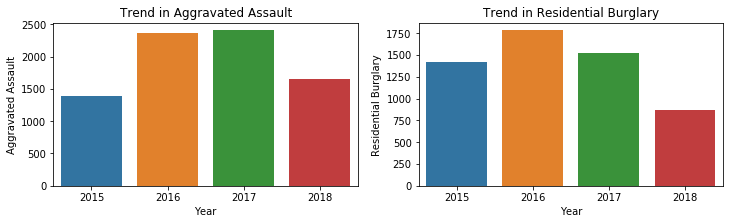

In [50]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
temp=data.loc[data['OFFENSE_CODE_GROUP']=='Aggravated Assault']['YEAR'].value_counts()
df_assault = pd.DataFrame({'Year':temp.index,'Aggravated Assault':temp.values})
sns.barplot(x='Year',y='Aggravated Assault',data=df_assault)
plt.title('Trend in Aggravated Assault')
plt.subplot(1,2,2)
temp=data.loc[data['OFFENSE_CODE_GROUP']=='Residential Burglary']['YEAR'].value_counts()
df_burglary = pd.DataFrame({'Year':temp.index,'Residential Burglary':temp.values})
sns.barplot(x='Year',y='Residential Burglary',data=df_burglary)
plt.title('Trend in Residential Burglary')
plt.show()


The above analysis shows that <font color=red><b>'Larceny'</b></font> has been the highest still now. Moreover <font color=red><b>2016,2017</b></font> have seen the highest number of crimes.

In [51]:
larceny_type=data.loc[data['OFFENSE_CODE_GROUP']=='Larceny']['OFFENSE_DESCRIPTION'].value_counts()
larceny_type #Info about the number and type of Larceny Cases from 2015-18 

LARCENY THEFT FROM BUILDING           9069
LARCENY SHOPLIFTING                   7949
LARCENY ALL OTHERS                    5963
LARCENY THEFT OF BICYCLE              2265
LARCENY PICK-POCKET                    455
LARCENY PURSE SNATCH - NO FORCE        188
LARCENY THEFT FROM COIN-OP MACHINE      16
LARCENY OTHER $200 & OVER                7
LARCENY IN A BUILDING $200 & OVER        5
LARCENY SHOPLIFTING $200 & OVER          4
LARCENY SHOPLIFTING UNDER $50            4
LARCENY BICYCLE $200 & OVER              3
LARCENY OTHER $50 TO $199                2
LARCENY SHOPLIFTING $50 TO $199          2
LARCENY IN A BUILDING UNDER $50          1
LARCENY IN A BUILDING $50 TO $199        1
LARCENY OTHER UNDER $50                  1
Name: OFFENSE_DESCRIPTION, dtype: int64

We see that  <font color=red><b>most Larceny Cases are reported as Theft from Building</font></b>

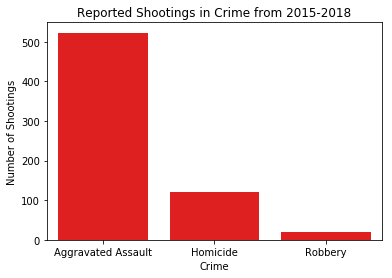

In [52]:
temp=data.loc[data['SHOOTING']=='Y']['OFFENSE_CODE_GROUP'].value_counts()
shooting_stats = pd.DataFrame({'Crime':temp.index,'Number of Shootings':temp.values})
sns.barplot(x='Crime',y='Number of Shootings',data=shooting_stats,color='red')
plt.title('Reported Shootings in Crime from 2015-2018')
plt.show()

However, we see that<font color=green><b> Larceny did not involve any shooting</b></font> and most of the <font color=red><b>Shooting Cases have been reported with Aggravated Assault</b></font>.

### Let's Analyse the crimes reported in 2016-17

In [0]:
data=data.loc[(data['YEAR']==2016)|(data['YEAR']==2017)]

##### Day Wise Analysis of crimes in 2016-17

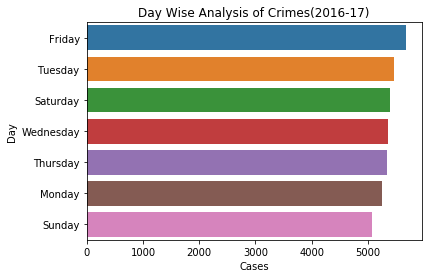

In [54]:
temp=data['DAY_OF_WEEK'].value_counts()
df_burglary = pd.DataFrame({'Day':temp.index,'Cases':temp.values})
sns.barplot(x='Cases',y='Day',data=df_burglary)
plt.title('Day Wise Analysis of Crimes(2016-17)')
plt.show()

Most of the crimes have been reported on Friday.

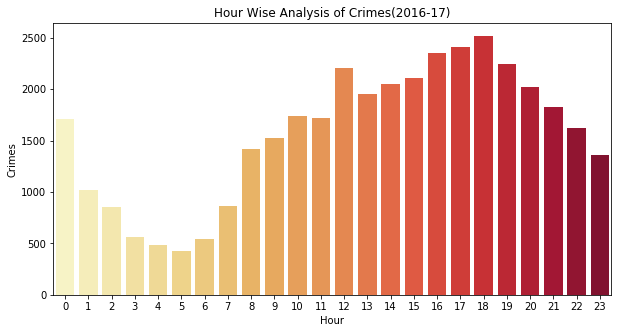

In [55]:
plt.figure(figsize=(10,5))
temp=data['HOUR'].value_counts()
crime_hour = pd.DataFrame({'Hour':temp.index,'Crimes':temp.values})
sns.barplot(y='Crimes',x='Hour',data=crime_hour,palette='YlOrRd')
plt.title('Hour Wise Analysis of Crimes(2016-17)')
plt.show()

Let's segregrate the data into different Time Zones and have an analysis of places where crimes are reported highest with respect to time of the day , i.e `Morning,Noon,Evening or Night`

`Morning Crimes` are reported from 12 A.M to 12 P.M<br>
`Afternoon Crimes` are reported from 12 P.M till 3 P.M <br>
`Evening Crimes` are reported from 3 P.M to 8 P.M <br>
`Night Crimes` are reported from 8 P.M till 12 A.M <br>


In [0]:
#introducing a new column 'crime_time' to segregate crimes in different parts of day
data['crime_time'] = data['HOUR'].map(lambda x: 'Late Night' if (x <=3) else 'Early Mrng' if (x<=6) else 'Mrng' if(x<12) else 'AtrNoon' if (x<16) else 'Evening' if (x<=20) else 'Night' )


In [57]:
Counter(data['crime_time'])

Counter({'AtrNoon': 8316,
         'Early Mrng': 1450,
         'Evening': 11546,
         'Late Night': 4154,
         'Mrng': 7264,
         'Night': 4808})

### Let's Analyse the most affected areas with crime activities in various areas of Boston in <b>2016-17</b>

##### Occurence of Crimes in various places of Boston in different parts of the day

In [58]:
early_mrng_top=data.loc[(data['crime_time']=='Early Mrng')]['STREET'].value_counts()
early_mrng_top.index[0] #street with highest crime reporting in early morning

'WASHINGTON ST'

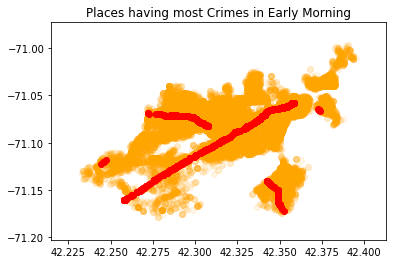

In [59]:
early_mrng_top_lat=data.loc[(data['STREET']==early_mrng_top.index[0])]['Lat']
early_mrng_top_long=data.loc[(data['STREET']==early_mrng_top.index[0])]['Long']
plt.scatter(data['Lat'],data['Long'],color='orange',alpha=0.1)
plt.scatter(early_mrng_top_lat,early_mrng_top_long,color='red')
plt.title('Places having most Crimes in Early Morning')
plt.show()

Most Crimes in Early Morning have been reported in `WASHINGTON ST`

In [61]:
mrng_top=data.loc[(data['crime_time']=='Mrng')]['STREET'].value_counts()
mrng_top.index[0] #street with highest crime reporting in early morning

'WASHINGTON ST'

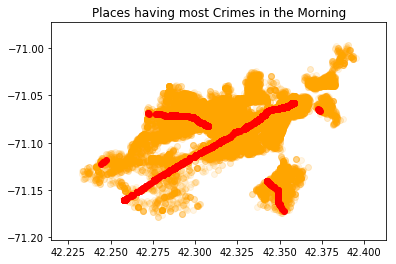

In [62]:
mrng_top_lat=data.loc[(data['STREET']==mrng_top.index[0])]['Lat']
mrng_top_long=data.loc[(data['STREET']==mrng_top.index[0])]['Long']
plt.scatter(data['Lat'],data['Long'],color='orange',alpha=0.1)
plt.scatter(mrng_top_lat,mrng_top_long,color='red')
plt.title('Places having most Crimes in the Morning')
plt.show()

Most Crimes in  Morning have been reported in `WASHINGTON ST`

In [63]:
noon_top=data.loc[(data['crime_time']=='AtrNoon')]['STREET'].value_counts()
noon_top.index[0] #street with highest crime reporting in afternoon

'BOYLSTON ST'

Most Crimes in AfterNoon have been reported in `BOYLSTON ST`

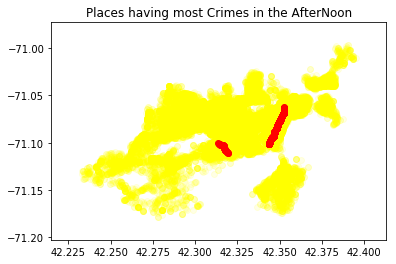

In [64]:
noon_top_lat=data.loc[(data['STREET']==noon_top.index[0])]['Lat']
noon_top_long=data.loc[(data['STREET']==noon_top.index[0])]['Long']
plt.scatter(data['Lat'],data['Long'],color='yellow',alpha=0.1)
plt.scatter(noon_top_lat,noon_top_long,color='red')
plt.title('Places having most Crimes in the AfterNoon')
plt.show()

In [65]:
evening_top=data.loc[(data['crime_time']=='Evening')]['STREET'].value_counts()
evening_top.index[0]  #street with highest crime reporting in evening

'BOYLSTON ST'

Most Crimes in Evening have been reported in `BOYLSTON ST`

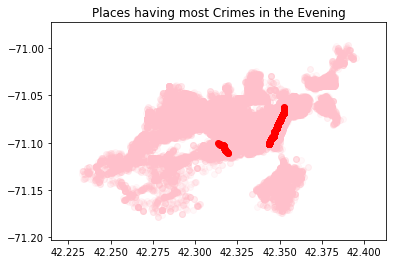

In [66]:
evening_top_lat=data.loc[data['STREET']==evening_top.index[0]]['Lat']
evening_top_long=data.loc[data['STREET']==evening_top.index[0]]['Long']
plt.scatter(data['Lat'],data['Long'],color='pink',alpha=0.1)
plt.scatter(evening_top_lat,evening_top_long,color='red')
plt.title('Places having most Crimes in the Evening')
plt.show()

In [67]:
night_top=data.loc[(data['crime_time']=='Night')]['STREET'].value_counts()
night_top.index[0] #street with highest crime reporting in Night

'WASHINGTON ST'

Most Crimes in Night have been reported in `WASHINGTON ST`

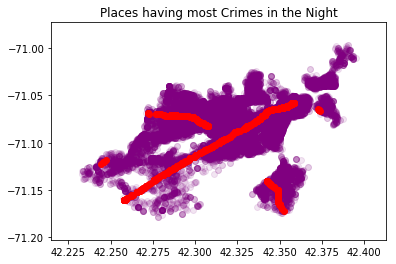

In [68]:
night_top_lat=data.loc[data['STREET']==night_top.index[0]]['Lat']
night_top_long=data.loc[data['STREET']==night_top.index[0]]['Long']
plt.scatter(data['Lat'],data['Long'],color='purple',alpha=0.1)
plt.scatter(night_top_lat,night_top_long,color='red')
plt.title('Places having most Crimes in the Night')
plt.show()

In [69]:
late_night_top=data.loc[(data['crime_time']=='Late Night')]['STREET'].value_counts()
late_night_top.index[0]

'UNKNOWN_street'

In [0]:
# We see that the name of the street is the unknown as was imputed against null values but we do get areas plotted in
#map below where most late night crimes happen.

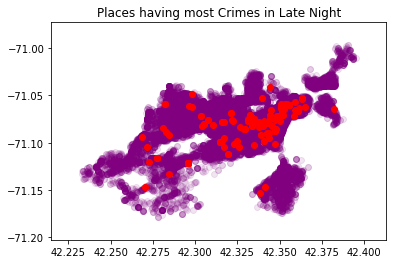

In [71]:
late_night_top_lat=data.loc[data['STREET']==late_night_top.index[0]]['Lat']
late_night_top_long=data.loc[data['STREET']==late_night_top.index[0]]['Long']
plt.scatter(data['Lat'],data['Long'],color='purple',alpha=0.1)
plt.scatter(late_night_top_lat,late_night_top_long,color='red')
plt.title('Places having most Crimes in Late Night')
plt.show()

Thus, it is seen that since most of the crimes occur in `Evening`, and it is mostly in the area of
<font color ='red'><b>BOYLSTON ST</b></font> where majority of crimes have occured in 2016-17.

#####  Analysis of Crimes reported in different parts of the day

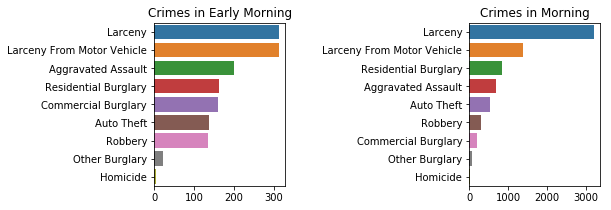

In [72]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
early_mrng_rate=data.loc[data['crime_time']=='Early Mrng']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=early_mrng_rate.index,x=early_mrng_rate.values)
plt.title('Crimes in Early Morning')
plt.subplot(1,3,3)
mrng_rate=data.loc[data['crime_time']=='Mrng']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=mrng_rate.index,x=mrng_rate.values)
plt.title('Crimes in Morning')
plt.show()

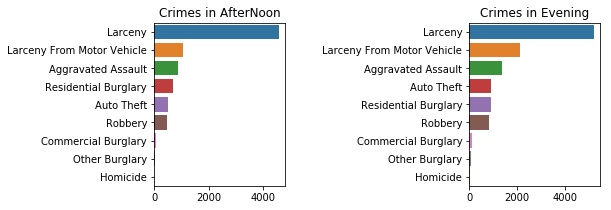

In [73]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
noon_rate=data.loc[data['crime_time']=='AtrNoon']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=noon_rate.index,x=noon_rate.values)
plt.title('Crimes in AfterNoon')
plt.subplot(1,3,3)
eve_rate=data.loc[data['crime_time']=='Evening']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=eve_rate.index,x=eve_rate.values)
plt.title('Crimes in Evening')
plt.show()

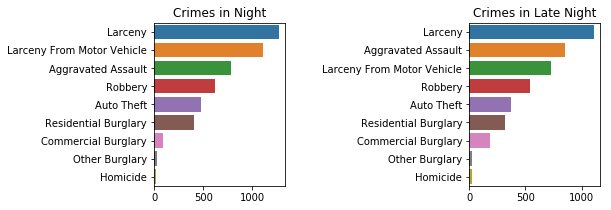

In [74]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
night_rate=data.loc[data['crime_time']=='Night']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=night_rate.index,x=night_rate.values)
plt.title('Crimes in Night')
plt.subplot(1,3,3)
late_night_rate=data.loc[data['crime_time']=='Late Night']['OFFENSE_CODE_GROUP'].value_counts()
sns.barplot(y=late_night_rate.index,x=late_night_rate.values)
plt.title('Crimes in Late Night')
plt.show()

Here, we see that most crimes reported are `Larceny` and most of them are reported in `AfterNoon and Evening`.

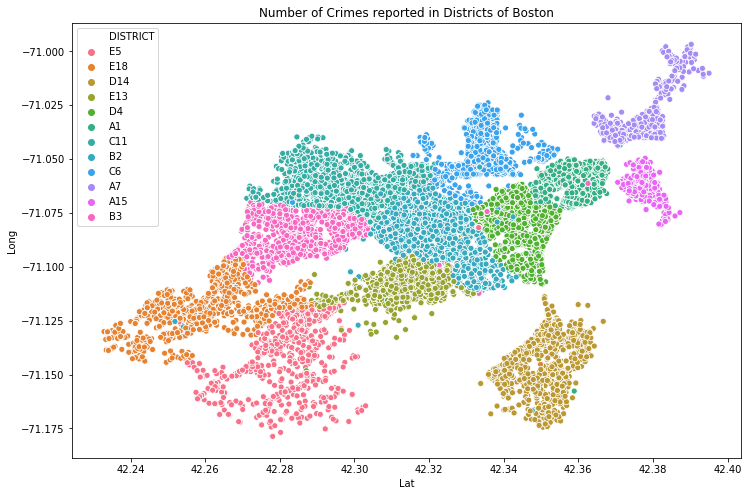

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['Lat'],y=data['Long'],hue=data['DISTRICT'])
plt.title('Number of Crimes reported in Districts of Boston')
plt.show()

In [76]:
data['DISTRICT'].value_counts()

D4     7493
B2     5412
A1     5212
C11    4122
B3     3081
C6     2607
D14    2442
E13    2213
E18    1620
A7     1262
E5     1125
A15     816
Name: DISTRICT, dtype: int64

The Highest Number of Crimes are reported in Districts like **D4,B2 and A1** which are in the `center of the Boston City.`

##### Analysing the  frequency of crimes based on the Months

In [0]:
data['MONTH'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

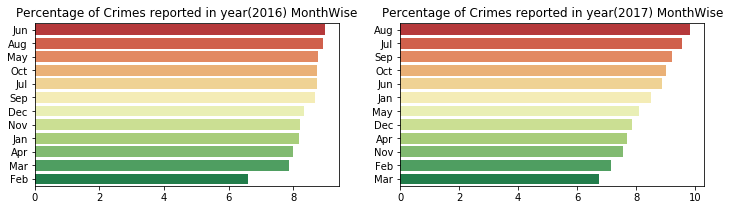

In [78]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
month_crime_16=data.loc[(data['YEAR']==2016)]['MONTH'].value_counts()
sns.barplot(y=month_crime_16.index,x=month_crime_16.values/len(data.loc[data['YEAR']==2016]) *100,palette='RdYlGn')
plt.title('Percentage of Crimes reported in year(2016) MonthWise')
plt.subplot(1,2,2)
month_crime_17=data.loc[(data['YEAR']==2017)]['MONTH'].value_counts()
sns.barplot(y=month_crime_17.index,x=month_crime_17.values/len(data.loc[data['YEAR']==2017]) *100,palette='RdYlGn')
plt.title('Percentage of Crimes reported in year(2017) MonthWise')
plt.show()

`August` and `June` has the highest number of crimes reported in the year of 2016 and 2017 respectively.But, However, we see that number of crimes reported is approximately same and hence regular check and strict rules should be followed throught out the year to curb crime rates in Boston.

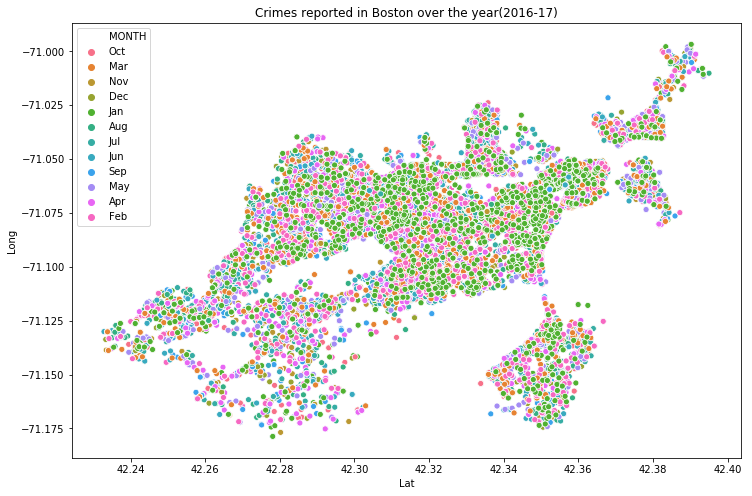

In [79]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['Lat'],y=data['Long'],hue=data['MONTH'])
plt.title('Crimes reported in Boston over the year(2016-17)')
plt.show()

Here, we see that the number of columns places marked with greeen spots have seen most of the crimes happening in the month of `July-September` and are in the center of the boston , whereas places marked with purple and blue markers are mostly on the left of the map,along the borders of the city.These markers represent crimes mostly happening in the month of`May,April and February`

### Summary

Summary from EDA:<br>
1. The highest reported serious crime have been `Larceny`.However, there have `been no shooting involved with the Larceny cases`.
2. The highest crimes have been reported in `2016-17`.
3. Most of the serious crimes have been reported in `AfterNoon and Evening`.
4. `Boyleston St.` has reported the highest number of serious crimesin 2016-17.
5. Most of the serious crimes occur in the center of the city like in districts D4,B2,A1.
6. Highest Number of Serious Crimes have been reported in the `Early Fall(July-September)`.
7. Serious Crimes in the center of the city are mostly reported in the month of June,July,August whereas places along the borderof the city including few places inside the city have mostly reported crimes in April,May and February.